<a href="https://colab.research.google.com/github/HyeJin816/ESSA_22/blob/main/0321_ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ch.4 모델 훈련**
#### 0321(월) 과제 : 핸즈온 157~202p

-----  
## **4.1 선형회귀**

*선형 회귀 모델* : 입력 특성의 가중치 합과 bias를 합하여 예측  
* $ y = \theta_0 + \theta_1\ x_1$ + \...+ $\theta_0\ x_n$  

* $ \hat{y}$ = $h(x)$ = **$\theta$** $x$
> **$\theta$** 는 편향 $\theta_0$과 $\theta_n$까지의 특성 가중치를 담은 모델의 파라미터 벡터  
> $x$는 $x_0$에서 $x_n$까지 담은 샘플의 특성 벡터  

모델이 훈련 세트에 잘 맞도록 모델 파라미터 설정.  
**회귀 성능 지표 RMSE** (평균 제곱근 오차)


### **4.1.1 정규방정식**  

정규방정식 Normal Equation : $\hat{\theta}= (X_b^TX_b)^{-1}X_b^Ty$

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
# 정규방정식으로 theta 계산
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best # 계산한 값

array([[3.96736059],
       [3.07480989]])

 $\theta_0 = 4$, $\theta_1=3$ 을 기대했으나 결과는 $\theta_0 = 3.967$, $\theta_1 = 3.074$

In [3]:
# theta로 예측
X_new = np.array(([0], [2]))
X_new_b = np.c_[np.ones((2, 1)), X_new]     #모든 샘플에 x0 = 1 추가
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 3.96736059],
       [10.11698038]])

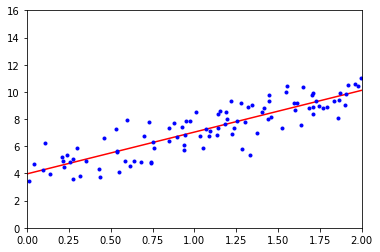

In [5]:
# 모델 예측 그래프
import matplotlib.pyplot as plt
plt.plot(X_new, y_pred, 'r-')
plt.plot(X, y, 'b.')
plt.xlim(0.00, 2.00)
plt.ylim(0, 16)
plt.show()

사이킷런에서 선형 회귀 수행.  
(LinearRegression 클래스는 최소 제곱 기반)

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([3.96736059]), array([[3.07480989]]))

In [7]:
lin_reg.predict(X_new)

array([[ 3.96736059],
       [10.11698038]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.96736059],
       [3.07480989]])

$\hat{\theta}= X^{+}y$
> $X^{+}$는 $X$의 유사역행렬  
> 유사역행렬 계산 함수 ```np.linalg.pinv()```  
> 특잇값분해(SVD) 기법으로 계산. 정규방정식 보다 훨씬 효율적

### **4.1.2 계산 복잡도**  

역행렬 계산 복잡도 = $O(n^{2.4})$ ~ $O(n^3)$  
> 사이킷런 LinearRegression 클래스 사용 SVD는 대략 $O(n^2)$  
> 특성 수가 많아질수록 계산 시간 증가.

-----  
## **4.2 경사 하강법**

+ **경사 하강법(GD)** : 비용 함수 최소화를 위한 반복 파라미터 조정 (gradient 감소 방향)

* **학습률** : 임의값으로 시작한 파라미터가 최솟값에 수렴할 때 까지 점진적으로 향상  
> *무작위 초기화* : 왼쪽에서 시작하면 global minimum 보다 덜 좋은 local minimum에 수렴. 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸려 일찍 멈추게 됨. 


### **4.2.1 배치 경사 하강법**  

각 모델의 파라미터 $\theta$에 대한 비용함수 그레디언트를 계산하여 편도함수를 계산

$\theta^{(nextstep)}$ = $\theta - η MSE(\theta)$

In [9]:
eta = 0.1            # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) 

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients


# theta 확인
theta

array([[3.96736059],
       [3.07480989]])

### **4.2.2 확률적 경사 하강법**  

매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트 계산  
> 다뤄야할 데이터가 적어 빠른 알고리즘 작동  
> 무작위라 배치경사하강법에 비해 불안정  
>개별 훈련 스텝은 빠르지만 상대적으로 확률적


In [10]:
n_epochs = 50     # 반복 에포크
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.rand(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [11]:
theta

array([[3.98379905],
       [3.06713934]])

사이킷런에서 SGD방식의 선형회귀를 위해 SGDRegressor 클래스 사용.

In [12]:
from sklearn.linear_model import SGDRegressor

sgd_rg = SGDRegressor(max_iter=1000, tol = 1e-3, penalty=None, eta0=0.1)
sgd_rg.fit(X, y.ravel())

sgd_rg.intercept_, sgd_rg.coef_  #정규방정식 결과와 유사

(array([3.9674453]), array([3.08968118]))

### **4.2.3 미니배치 경사 하강법**  

임의의 작은 샘플 세트(미니배치)에 대해 그레이디언트 계산  
> 행렬 연산에 최적화된 하드웨어(GPU)를 사용해서 얻는 성능 향상  
> SGD보다 덜 불규칙하여 최솟값에 더 가까이 도달

-----  
## **4.3 다항 회귀**

+ 각 특성의 거듭제곱을 새로운 특성으로 추가하여 이를 포함한 데이터셋 모델 훈련 


In [13]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# 사이킷런 PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[1.49967334]
[1.49967334 2.24902011]


In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.09354713]), array([[1.0517313 , 0.48219764]]))

-----  
## **4.4 학습 곡선**

+ 훈련 세트에서 크기가 다른 서브 세트로 모델을 여러번 훈련시켜 훈련 및 검증 성능을 함수로 표현


In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(test_errors), 'b-', linewidth=3, label='test')
    plt.legend()

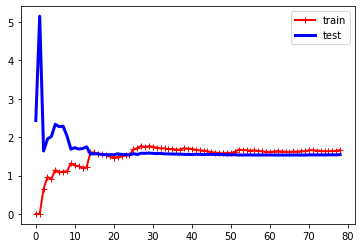

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화 될 수 없어서 초기에 검증오차가 크지만 훈련 샘플이 추가될 수록 검증오차 서서히 감소.

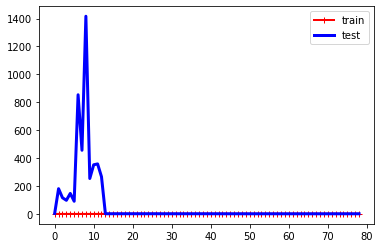

In [24]:
# 10차 다항 회귀 모델

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                                  ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

-----  
## **4.5 규제가 있는 선형모델**



### **4.5.1 릿지회귀**  

+  규제가 추가된 선형 회귀 버전   $J(\theta)=MSE(\theta) + \alpha\frac{1}{2}\Sigma\theta_i^2$
> 모델의 가중치가 가능한 한 작게 유지  
> 입력 특성 스케일에 민감해 수행전에 데이터 스케일 맞추는 것이 중요


In [25]:
# 행렬 분해를 사용하여 변형한 방정식

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.24147869])

In [26]:
# 확률적 경사 하강법

sgd = SGDRegressor(penalty='l2')
sgd.fit(X, y.ravel())
sgd.predict([[1.5]])

array([5.25901049])

penalty 인자 : 사용할 규제 지정. I2는 릿지회귀

### **4.5.2 라쏘 회귀**  

+  비용 함수에 규제항을 더해서 릿지와 유사 $J(\theta)=MSE(\theta) + \alpha\Sigma|\theta_i|$
> 덜 중요한 특성의 가중치를 제거하려고 함(가중치 0)  

In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
lasso.predict([[1.5]])

array([5.24147869])

### **4.5.3 엘라스틱넷**  

+  릿지 회귀와 라쏘 회의 절충
> 릿지와 회귀의 규제항을 단순히 더하며, 혼합 정도는 혼합 비율 r로 조절  
> r=0이면 릿지회귀, r=1이면 라쏘 회귀

In [28]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X, y)
elastic.predict([[1.5]])

array([5.24190087])

### **4.5.4 조기 종료**  

+  검증 에러가 최솟값에 도달하면 바로 훈련 중지
> 검증 에러가 감소하다가 다시 상승하는 것은 과대적합을 의미

In [33]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 훈련을 이어서 진행합니다.
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

-----  
## **4.6 로지스틱 회귀**

+ 샘플이 특정 클래스에 속할 확률을 추정  
> 이진분류기 : 레이블 1 양성, 레이블 0 음성



### **4.6.1 확률 추정**  

+  입력 특성의 가중치 합 계산
> 바로 결과 출력이 아닌 결과값의 로지스틱을 출력 (시그모이드 함수)


### **4.6.2 훈련과 비용함수**  

+  훈련 목적 : 양성 샘플에 대해 높은 확률로 추정하고 음성 샘플에 대해 낮은 확률을 추정하는 모델의 파라미터 추출.


### **4.6.3 결정 경계**  



In [34]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [35]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [36]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

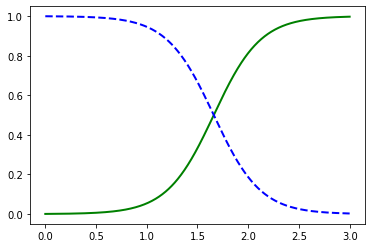

In [37]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

### **4.6.4 소프트맥스 회귀**  

+ 여러개의 이진분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원(다항 로지스틱 회귀)
